In [1]:
import pandas as pd
df = pd.read_csv("poly1.csv")
df

,x,y
0,1,1
1,2,3
2,3,8
3,4,16
4,5,25
5,6,33
6,7,52
7,8,66
8,9,79
9,10,105


<function matplotlib.pyplot.show(*args, **kw)>

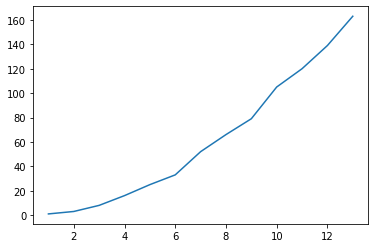

In [24]:
import numpy as np
x = df.iloc[:,0]
y = df.iloc[:,1]
x = np.array(x)
y = np.array(y)
import matplotlib.pyplot as plt
plt.plot(x,y)
plt.show


In [25]:
# say poly  is 2
import random
w0 = random.random()
w1 = random.random()
w2 = random.random()


In [26]:
yp = w0 +w1*x + w2*(x**2)
yp

array([  2.13947536,   4.93027806,   8.98066341,  14.2906314 ,
        20.86018205,  28.68931534,  37.77803128,  48.12632988,
        59.73421112,  72.601675  ,  86.72872154, 102.11535073,
       118.76156257])

In [27]:
error = (sum((y-yp)**2))/24

In [28]:
error

267.1532226808209

In [29]:
alpha = 0.0002

In [30]:
while(error>10):
    dj0 = (sum(y-yp))/12
    dj1 = (sum((y-yp)* x))/12
    dj2 = (sum((y-yp)* (x**2)))/12
    w0 = w0 + (alpha*dj0)
    w1 = w1 + (alpha*dj1)
    w2 = w2 +(alpha*dj2)
    yp=w0+w1*x + w2*(x**2)
    error = (sum((y-yp)**2))/24
    print(error)

70.40334649244608
21.05987437357898
8.683908093111079


In [31]:
w0


0.6102941846291486

In [32]:
w1

0.9273243923876109

In [33]:
w2

0.9264469081202917

In [34]:
yp=w0+w1*x + w2*(x**2)
yp

array([  2.46406549,   6.1707306 ,  11.73028953,  19.14274228,
        28.40808885,  39.52632923,  52.49746343,  67.32149144,
        83.99841327, 102.52822892, 122.91093838, 145.14654166,
       169.23503876])

In [35]:
y

array([  1,   3,   8,  16,  25,  33,  52,  66,  79, 105, 120, 139, 163],
      dtype=int64)

In [36]:
import pandas as pd
table = pd.DataFrame(y)
table["pred val"] = yp
table["diff"] = table[0] -  table["pred val"]
table

,0,pred val,diff
0,1,2.464065,-1.464065
1,3,6.170731,-3.170731
2,8,11.730290,-3.730290
3,16,19.142742,-3.142742
4,25,28.408089,-3.408089
5,33,39.526329,-6.526329
6,52,52.497463,-0.497463
7,66,67.321491,-1.321491
8,79,83.998413,-4.998413
9,105,102.528229,2.471771


In [15]:
import pandas as pd
df = pd.read_csv("poly1.csv")
df

,x,y
0,1,1
1,2,3
2,3,8
3,4,16
4,5,25
5,6,33
6,7,52
7,8,66
8,9,79
9,10,105


In [16]:
x = df.iloc[:,:-1]
y = df.iloc[:,1]

In [17]:
x

,x
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [18]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)
print(x_poly)

[[  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]]


In [19]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_poly, y, test_size = 1/3, random_state = 0)

In [20]:
x_train

array([[  1.,   9.,  81.],
       [  1.,   2.,   4.],
       [  1.,   8.,  64.],
       [  1.,  10., 100.],
       [  1.,   4.,  16.],
       [  1.,   1.,   1.],
       [  1.,   6.,  36.],
       [  1.,  13., 169.]])

In [21]:
from sklearn.linear_model import LinearRegression

In [19]:
k =LinearRegression()

In [21]:
k.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [24]:
l =k.predict(x_test)

In [25]:
l

array([ 49.68569067, 141.42089448,  25.71056765, 119.43986557,
         9.00342093])

In [26]:
y_test

6      52
11    139
4      25
10    120
2       8
Name: y, dtype: int64

In [27]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
rmse = np.sqrt(mean_squared_error(y_test,l))

In [28]:
rmse

1.6150707887352223

In [30]:
r2_score(y_test,l)

0.9990300838665609

In [31]:
print('Intercept: \n', k.intercept_)
print('Coefficients: \n', k.coef_)

Intercept: 
 -2.429843622570452
Coefficients: 
 [0.         1.08559707 0.90849704]
